# Predict Survival on the Titanic
---
![Titanic](https://i.ytimg.com/vi/cMVi953awHQ/maxresdefault.jpg)

## 1.Introduction

Hello, Everyone. This is the second kernel that I shared.First thing that we will do is:
- <b>importing libraries</b>
- <b>importing dataset</b>

In [1]:
# Importing  libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [2]:
# Importing the dataset
df_train = pd.read_csv('D:\\data science\\Projects\\Titanic\\train.csv')
df_test = pd.read_csv('D:\\data science\\Projects\\Titanic\\test.csv')

Gain some information about df_train

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 2.Visualize data 
Now we can visualize our df_train dataset.

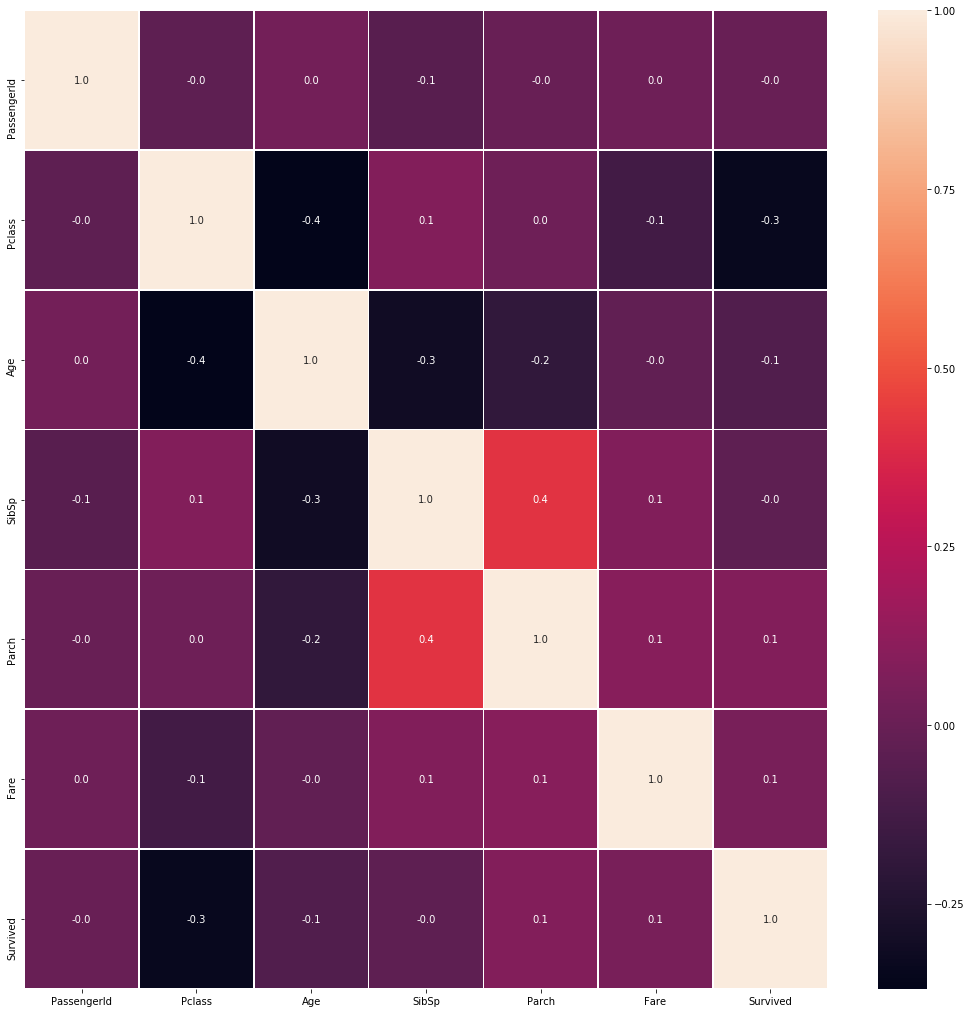

In [4]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


as a first look, we can see there is a negative relation between Pclass and Survived variables.

Now, let's see how much woman and male survived with a countplot.

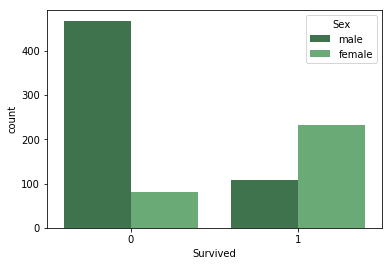

In [5]:
#male vs female survive table
sns.countplot(x="Survived", hue="Sex", data=df_train, palette="Greens_d")

as you can see, female survivors are more than male survivors.

Now, the age distribution:

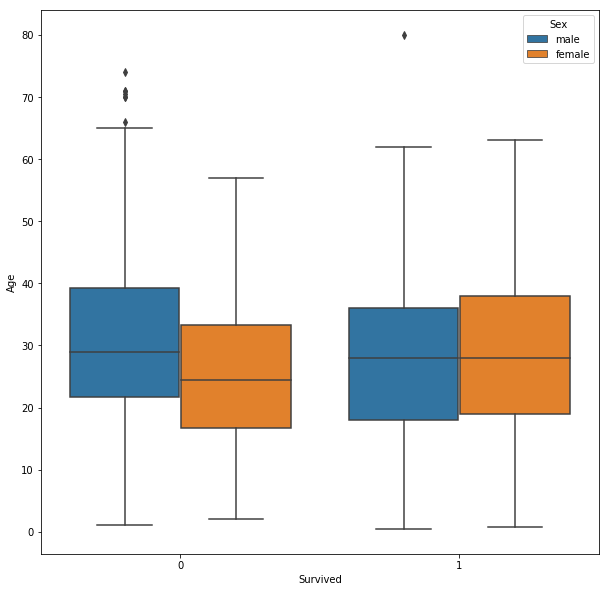

In [6]:
#age vs survive table with gender
f,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="Survived", y="Age", hue="Sex", data=df_train, ax = ax)

there is not a big age difference between male and female survivors, but there is between who can't survived.

We can Age vs Survive with a different plot:

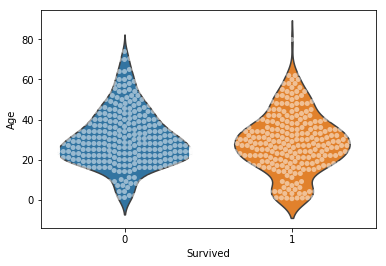

In [7]:
sns.violinplot(x="Survived", y="Age", data=df_train, inner=None)
sns.swarmplot(x="Survived", y="Age", data=df_train, color="w", alpha=.5)

Connection between Pclass and Survivors with graph:

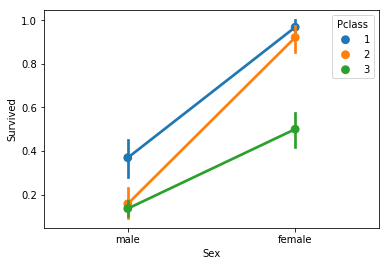

In [8]:
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=df_train)

In males, first class' survive rate is higher.In females, first and second class' survive rate are higher.

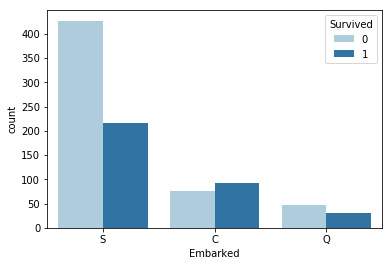

In [9]:
sns.countplot(x = 'Embarked',hue = 'Survived', data = df_train,
            palette = 'Paired')

most of the guests are from Southampton and most of them couldn't make it.

# 3.Check Data

In [10]:
#looking at the data
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


We can see missing values from the first five rows of our data.

Let's combine data and training set, then see how much missing values are there.

In [11]:
#combine test and train set
Survived = df_train['Survived']
df_train.drop('Survived', axis = 1, inplace = True)
df_combine = pd.concat([df_train, df_test], axis = 0)

In [12]:
#getting missing values
missing_data = df_combine.isnull()

#now we can see how much missing data there are
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

PassengerId
False    1309
Name: PassengerId, dtype: int64

Pclass
False    1309
Name: Pclass, dtype: int64

Name
False    1309
Name: Name, dtype: int64

Sex
False    1309
Name: Sex, dtype: int64

Age
False    1046
True      263
Name: Age, dtype: int64

SibSp
False    1309
Name: SibSp, dtype: int64

Parch
False    1309
Name: Parch, dtype: int64

Ticket
False    1309
Name: Ticket, dtype: int64

Fare
False    1308
True        1
Name: Fare, dtype: int64

Cabin
True     1014
False     295
Name: Cabin, dtype: int64

Embarked
False    1307
True        2
Name: Embarked, dtype: int64



Age has 263, Fare has 1, Embarked has 2 and Cabin has 1014 missing values.That means Cabin has to be deleted.

# 3.1 Filling Missing Values

In [13]:
#filling Embarked column that have missing values with the mode
df_combine['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
df_combine["Embarked"].replace(np.nan, "S", inplace = True)

In [15]:
#filling Age column that have missing values with the mean
mean_Age = df_combine['Age'].mean()
df_combine['Age'].replace(np.nan, mean_Age, inplace = True)

In [16]:
#filling Fare column that have missing values with the mean
mean_Fare = df_combine['Fare'].mean()
df_combine['Fare'].replace(np.nan, mean_Fare, inplace = True)

In [17]:
#dropping Cabin column
df_combine.drop('Cabin', axis = 1, inplace = True)

In [18]:
#dropping Ticket column
df_combine.drop('Ticket', axis = 1, inplace = True)

Now see our data again:

In [19]:
#info about df_combine
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


In [20]:
#looking at the data
df_combine.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7925.0000,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# 4.Feature Engineering
- We can see title of people before dropping 'Name' column.
- We can combine SibSp and Parch columns into one columns.

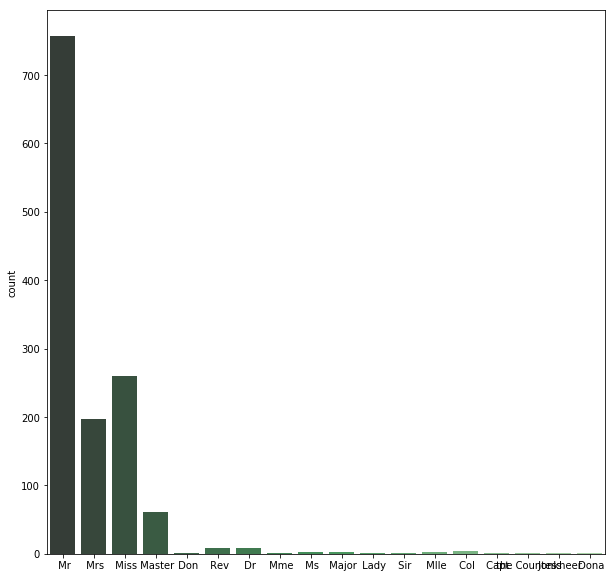

In [21]:
#dropping name.We will save name columns for later
Name_Col = df_combine['Name']
df_combine.drop('Name', axis = 1, inplace = True)

#getting titles of peoples
title = []
import re
delimiters = ",", "."
regexPattern = '|'.join(map(re.escape, delimiters))
for x in Name_Col:
   x = re.split(regexPattern, x)
   title.append(x[1])

#visualize titles
df_title = pd.DataFrame(data = title)
df_title[0].unique()
f,ax2 = plt.subplots(figsize=(10, 10))
sns.countplot(x=title, palette="Greens_d", ax = ax2)

Now merging 'SibSp' and 'Parch' into 'hasFamily', then dropping SibSp and Parch.

In [22]:
#combining SibSp and Parch columns
df_combine['family'] = df_combine['SibSp'] + df_combine['Parch']
#creating a column that contains SibSp and Parch
df_combine['hasFamily'] = np.where(df_combine['family'] > 0 , 1, 0) 
#drop the family, SibSp and Parch columns
df_combine.drop('family', axis = 1, inplace = True)
df_combine.drop('SibSp', axis = 1, inplace = True)
df_combine.drop('Parch', axis = 1, inplace = True)

# 5.Categorical Data
Now we'll get 'Sex', 'Pclass', 'Embarked' categorical variables' dummy variables.Then we will turn them to integer types.

In [23]:
#get dummy variables of categorical data
df_combine = pd.get_dummies(data = df_combine, columns = ['Sex', 'Pclass', 'Embarked'])

#drop female columns(because we don't need it)
df_combine.drop('Sex_female', axis = 1, inplace = True)

#convert uints to ints
df_combine['Sex_male'] = df_combine['Sex_male'].astype(int)
df_combine['Pclass_1'] = df_combine['Pclass_1'].astype(int)
df_combine['Pclass_2'] = df_combine['Pclass_2'].astype(int)
df_combine['Pclass_3'] = df_combine['Pclass_3'].astype(int)
df_combine['Embarked_Q'] = df_combine['Embarked_Q'].astype(int)
df_combine['Embarked_S'] = df_combine['Embarked_S'].astype(int)
df_combine['Embarked_C'] = df_combine['Embarked_C'].astype(int)

#info about data
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
hasFamily      1309 non-null int32
Sex_male       1309 non-null int32
Pclass_1       1309 non-null int32
Pclass_2       1309 non-null int32
Pclass_3       1309 non-null int32
Embarked_C     1309 non-null int32
Embarked_Q     1309 non-null int32
Embarked_S     1309 non-null int32
dtypes: float64(2), int32(8), int64(1)
memory usage: 81.8 KB


# 6. Modelling
- Splitting data to train and test.
- Feature scaling
- Compare models
 - Visualize models' scores

In [24]:
#splitting data to train and test back
df_train = df_combine.iloc[:891]
df_test = df_combine.iloc[891:]
X_test = df_test.copy()

In [25]:
#get back survived column
df_train['Survived'] = Survived
#looking at data
df_train.head(10)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PassengerId,Age,Fare,hasFamily,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.000000,7.2500,1,1,0,0,1,0,0,1,0
1,2,38.000000,71.2833,1,0,1,0,0,1,0,0,1
2,3,26.000000,7925.0000,0,0,0,0,1,0,0,1,1
3,4,35.000000,53.1000,1,0,1,0,0,0,0,1,1
4,5,35.000000,8.0500,0,1,0,0,1,0,0,1,0
5,6,29.881138,8.4583,0,1,0,0,1,0,1,0,0
6,7,54.000000,51.8625,0,1,1,0,0,0,0,1,0
7,8,2.000000,21075.0000,1,1,0,0,1,0,0,1,0
8,9,27.000000,11.1333,1,0,0,0,1,0,0,1,1
9,10,14.000000,30.0708,1,0,0,1,0,1,0,0,1


In [26]:
#getting X ve y values for modelling
X_train = df_train.iloc[:, 0:11].values
y_train = df_train.iloc[:, 11]

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now we'll fit Logistic Regression, Support Vector Machine, Naive Bayes and XGBoost algorithms. 

In [28]:
#use models and compare

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)
LrScore = classifierLR.score(X_train, y_train)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifierSvm = SVC(kernel = 'rbf', random_state = 0)
classifierSvm.fit(X_train, y_train)
SvmScore = classifierSvm.score(X_train, y_train)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifierNb = GaussianNB()
classifierNb.fit(X_train, y_train)
NbScore = classifierNb.score(X_train, y_train)

# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifierXg = XGBClassifier()
classifierXg.fit(X_train, y_train)
XgScore = classifierXg.score(X_train, y_train)

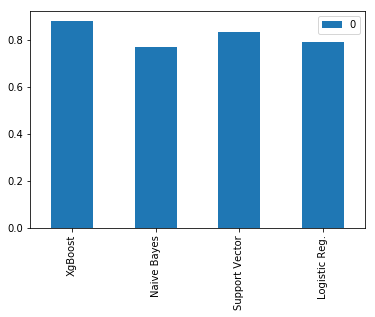

In [29]:
#visualize for comparing models
scores_dict = {'XgBoost': XgScore, 'Naive Bayes': NbScore, 
               'Support Vector': SvmScore, 'Logistic Reg.': LrScore}
df_scores = DataFrame.from_dict(data = scores_dict, orient = 'index')
df_scores.plot.bar()

As you can see, XGBoost model has the highest score. And that score is:

In [30]:
print(XgScore)

0.882154882155


# 7.Model Selection
- k-Fold Cross Validation
- Grid Search
    - Fit and Predict with Best Model

In [31]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierXg, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.81045823402564976

In [32]:
#standart deviation of accuracies
accuracies.std()

0.033059836575446554

In [33]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.05, 0.1, 0.2],
               'n_estimators': [10, 100, 500, 1000], 'min_child_weight': [1, 2,
                               3, 4]},]
grid_search = GridSearchCV(estimator = classifierXg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = 1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [34]:
best_accuracy

0.8271604938271605

In [35]:
#Fitting and Predicting
grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)

# 8.Submission File
- Create Submission File
    - Check Submission File
- Visualize Submission

In [36]:
#create submission.csv
Submission = pd.DataFrame({'PassengerId' : df_test['PassengerId'],
                           'Survived' : y_pred })
Submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


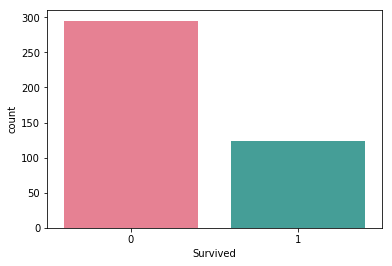

In [37]:
sns.countplot(x="Survived", data=Submission, palette="husl")
Submission.to_csv("Submission.csv", index = False)

Thank you for reading this kernel. My English is not on a native level, so if I have a misspell please warn me.